In [1]:
import pandas as pd
from datetime import datetime
import numpy as np

In [2]:
import matplotlib.pyplot as plt 
import seaborn as sns

**Datos Movimiento de taxis NYC.**<br>

**TLC Monthy Report.**<br>
https://www.nyc.gov/site/tlc/about/tlc-trip-record-data.page

In [108]:
industry_metrics = pd.read_csv("https://www1.nyc.gov/assets/tlc/downloads/csv/data_reports_monthly.csv")

In [109]:
industry_metrics

,Month/Year,License Class,Trips Per Day,Farebox Per Day,Unique Drivers,Unique Vehicles,Vehicles Per Day,Avg Days Vehicles on Road,Avg Hours Per Day Per Vehicle,Avg Days Drivers on Road,Avg Hours Per Day Per Driver,Avg Minutes Per Trip,Percent of Trips Paid with Credit Card,Trips Per Day Shared
0,2023-01,Green,"2,199","43,733",960,911,488,16.6,3.5,16.1,3.5,13.8,66%,-
1,2023-01,FHV - High Volume,"596,095",-,"77,641","74,553","50,996",21.2,6.4,20.7,6.3,18,-,"9,998"
2,2023-01,FHV - Black Car,"15,978",-,"7,197","6,809","2,877",13.1,4.3,12.8,4.2,25,-,-
3,2023-01,FHV - Livery,"18,853",-,"4,778","4,614","2,791",18.8,4.9,18.5,4.8,18,-,-
4,2023-01,FHV - Lux Limo,"1,060",-,"1,501","1,468",532,11.3,2.0,11.3,1.9,63,-,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
654,2010-05,Yellow,"499,374","5,561,218","30,950","13,309","12,729",29.6,14.8,22.7,8.3,-,35%,-
655,2010-04,Yellow,"504,798","5,502,545","30,827","13,326","12,856",28.9,14.8,22.3,8.3,-,35%,-
656,2010-03,Yellow,"415,567","3,011,750","28,709","12,183","10,382",26.4,15.1,20.4,8.3,11.5,35%,-
657,2010-02,Yellow,"397,969","3,392,416","28,255","12,171","10,045",23.1,14.6,17.6,8.3,11.1,35%,-


Convert column names to lowercase

In [5]:
industry_metrics.columns = industry_metrics.columns.str.lower()
industry_metrics.columns

Index(['month/year', 'license class',
       '               trips per day               ',
       '               farebox per day               ',
       '                unique drivers                ',
       '                unique vehicles                ',
       '                vehicles per day                ',
       '           avg days vehicles on road           ',
       '           avg hours per day per vehicle           ',
       '           avg days drivers on road           ',
       '           avg hours per day per driver           ',
       '           avg minutes per trip           ',
       'percent of trips paid with credit card', ' trips per day shared '],
      dtype='object')

In [6]:
industry_metrics.columns = [col.strip() for col in industry_metrics.columns]

In [7]:
industry_metrics.columns

Index(['month/year', 'license class', 'trips per day', 'farebox per day',
       'unique drivers', 'unique vehicles', 'vehicles per day',
       'avg days vehicles on road', 'avg hours per day per vehicle',
       'avg days drivers on road', 'avg hours per day per driver',
       'avg minutes per trip', 'percent of trips paid with credit card',
       'trips per day shared'],
      dtype='object')

In [8]:
industry_metrics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 659 entries, 0 to 658
Data columns (total 14 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   month/year                              659 non-null    object 
 1   license class                           659 non-null    object 
 2   trips per day                           659 non-null    object 
 3   farebox per day                         655 non-null    object 
 4   unique drivers                          659 non-null    object 
 5   unique vehicles                         659 non-null    object 
 6   vehicles per day                        659 non-null    object 
 7   avg days vehicles on road               659 non-null    float64
 8   avg hours per day per vehicle           659 non-null    float64
 9   avg days drivers on road                659 non-null    float64
 10  avg hours per day per driver            659 non-null    float6

Remove "%" and Convert percent_of_trips_paid_with_credit_card to numeric

In [9]:
industry_metrics['percent of trips paid with credit card'] = industry_metrics['percent of trips paid with credit card'].replace({'%': '','-':''}, regex=True) #.astype(float)
industry_metrics['percent of trips paid with credit card'] = pd.to_numeric(industry_metrics['percent of trips paid with credit card'], errors='coerce') / 100
industry_metrics['percent of trips paid with credit card'] = industry_metrics['percent of trips paid with credit card'].fillna(0.0)
industry_metrics['percent of trips paid with credit card']

0      0.66
1      0.00
2      0.00
3      0.00
4      0.00
       ... 
654    0.35
655    0.35
656    0.35
657    0.35
658    0.32
Name: percent of trips paid with credit card, Length: 659, dtype: float64

Create month_year and drop month/year column

In [10]:
industry_metrics["date"] = pd.to_datetime(industry_metrics["month/year"], format="%Y/%m").dt.strftime('%Y-%m')
industry_metrics.drop(columns=["month/year"], inplace=True)
industry_metrics["date"]

0      2023-01
1      2023-01
2      2023-01
3      2023-01
4      2023-01
        ...   
654    2010-05
655    2010-04
656    2010-03
657    2010-02
658    2010-01
Name: date, Length: 659, dtype: object

convert columns to numeric

In [11]:
industry_metrics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 659 entries, 0 to 658
Data columns (total 14 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   license class                           659 non-null    object 
 1   trips per day                           659 non-null    object 
 2   farebox per day                         655 non-null    object 
 3   unique drivers                          659 non-null    object 
 4   unique vehicles                         659 non-null    object 
 5   vehicles per day                        659 non-null    object 
 6   avg days vehicles on road               659 non-null    float64
 7   avg hours per day per vehicle           659 non-null    float64
 8   avg days drivers on road                659 non-null    float64
 9   avg hours per day per driver            659 non-null    float64
 10  avg minutes per trip                    659 non-null    object

In [12]:
industry_metrics.columns

Index(['license class', 'trips per day', 'farebox per day', 'unique drivers',
       'unique vehicles', 'vehicles per day', 'avg days vehicles on road',
       'avg hours per day per vehicle', 'avg days drivers on road',
       'avg hours per day per driver', 'avg minutes per trip',
       'percent of trips paid with credit card', 'trips per day shared',
       'date'],
      dtype='object')

In [13]:
industry_metrics['trips per day'] = industry_metrics['trips per day'].apply(lambda x: x.strip().replace(',', '')).astype(int)
industry_metrics['trips per day']

0        2199
1      596095
2       15978
3       18853
4        1060
        ...  
654    499374
655    504798
656    415567
657    397969
658    479376
Name: trips per day, Length: 659, dtype: int32

In [14]:
industry_metrics.head()

,license class,trips per day,farebox per day,unique drivers,unique vehicles,vehicles per day,avg days vehicles on road,avg hours per day per vehicle,avg days drivers on road,avg hours per day per driver,avg minutes per trip,percent of trips paid with credit card,trips per day shared,date
0,Green,2199,"43,733",960,911,488,16.6,3.5,16.1,3.5,13.8,0.66,-,2023-01
1,FHV - High Volume,596095,-,"77,641","74,553","50,996",21.2,6.4,20.7,6.3,18,0.00,"9,998",2023-01
2,FHV - Black Car,15978,-,"7,197","6,809","2,877",13.1,4.3,12.8,4.2,25,0.00,-,2023-01
3,FHV - Livery,18853,-,"4,778","4,614","2,791",18.8,4.9,18.5,4.8,18,0.00,-,2023-01
4,FHV - Lux Limo,1060,-,"1,501","1,468",532,11.3,2.0,11.3,1.9,63,0.00,-,2023-01


In [15]:
industry_metrics['farebox per day'].unique()

array([' 43,733 ', ' - ', ' 2,335,375 ', '45,208', '2,358,924', '35,984',
       '2,088,897', '  -  ', '2,293,014', '39,960', '   -   ',
       '2,100,507', '43,814', '    -    ', '38,915', '1,918,370',
       '     -     ', '1,921,789', '37,356', '2,057,705', '44,572',
       '44,850', '2,234,977', '        -        ', '         -         ',
       '2,219,127', '43,591', '          -           ', '42,436',
       '2,097,334', '40,475', '          -          ', '1,805,865',
       '1,330,596', '           -           ', '32,510', '1,903,870',
       '            -            ', '70,840', '2,103,014', '82,076',
       '             -             ', '              -              ',
       '1,993,228', '82,093', '               -               ', '77,261',
       '1,826,391', '1,611,851', '63,670', '63,047', '1,605,062',
       '65,833', '1,607,814', '65,575', '1,340,447', '67,873',
       '1,182,789', '62,408', '979,149',
       '                -                ', '52,276', '755,115', n

In [16]:
industry_metrics['farebox per day'] = industry_metrics['farebox per day'].apply(lambda x: x.strip() if isinstance(x, str) else x)
industry_metrics['farebox per day'] = industry_metrics['farebox per day'].replace('-', '0')
industry_metrics['farebox per day'] = industry_metrics['farebox per day'].fillna('0')
industry_metrics['farebox per day'] = industry_metrics['farebox per day'].apply(lambda x: x.strip().replace(',', '')).astype(int)
industry_metrics['farebox per day'] = pd.to_numeric(industry_metrics['farebox per day'])
industry_metrics['farebox per day']

0        43733
1            0
2            0
3            0
4            0
        ...   
654    5561218
655    5502545
656    3011750
657    3392416
658    4968817
Name: farebox per day, Length: 659, dtype: int32

In [17]:
industry_metrics['unique drivers'] = industry_metrics['unique drivers'].apply(lambda x: x.strip().replace(',', '')).astype(int)
industry_metrics['unique drivers']

0        960
1      77641
2       7197
3       4778
4       1501
       ...  
654    30950
655    30827
656    28709
657    28255
658    30659
Name: unique drivers, Length: 659, dtype: int32

In [18]:
industry_metrics['unique vehicles'] = industry_metrics['unique vehicles'].apply(lambda x: x.strip().replace(',', '')).astype(int)
industry_metrics['unique vehicles']

0        911
1      74553
2       6809
3       4614
4       1468
       ...  
654    13309
655    13326
656    12183
657    12171
658    13305
Name: unique vehicles, Length: 659, dtype: int32

In [19]:
industry_metrics['vehicles per day'] = industry_metrics['vehicles per day'].apply(lambda x: x.strip().replace(',', '')).astype(int)
industry_metrics['vehicles per day']

0        488
1      50996
2       2877
3       2791
4        532
       ...  
654    12729
655    12856
656    10382
657    10045
658    12727
Name: vehicles per day, Length: 659, dtype: int32

In [20]:
industry_metrics['avg minutes per trip'] = industry_metrics['avg minutes per trip'].apply(lambda x: x.strip().replace('-',''))
industry_metrics['avg minutes per trip'] = industry_metrics['avg minutes per trip'].fillna('0')
industry_metrics['avg minutes per trip'] = pd.to_numeric(industry_metrics['avg minutes per trip'])
industry_metrics['avg minutes per trip'] = industry_metrics['avg minutes per trip'].fillna(0.0)
industry_metrics['avg minutes per trip']

0      13.8
1      18.0
2      25.0
3      18.0
4      63.0
       ... 
654     0.0
655     0.0
656    11.5
657    11.1
658     0.0
Name: avg minutes per trip, Length: 659, dtype: float64

In [21]:
industry_metrics['trips per day shared'].unique()

array(['-', '9,998', ' -   ', '10,672', ' - ', '9,336', '3,573', '443',
       '466', '853', '133', '277', '716', '723', '635', '124', '  -  ',
       '41,051', '97,117', '90,550', '93,421', '103,379', '107,676',
       '107,780', '104,983', '104,074', '101,645', '124,106', '141,734',
       '157,704', '171,912', nan, '104', '157,678', '30', '128',
       '164,666', '35', '17,734', '160,672', '36', '158', '176,348', '34',
       '291', '148,283', '16', '168,299', '15', '13', '163,171', '18',
       '143,298', '148,036', '160,806', '14', '157,162', '12', '140,622',
       '19', '126,738', '118,649', '107,750', '92,641', '84,200',
       '76,026', '6', '68,756', '63,620'], dtype=object)

In [22]:
industry_metrics['trips per day shared'] = industry_metrics['trips per day shared'].apply(lambda x: x.strip() if isinstance(x, str) else x)
industry_metrics['trips per day shared'] = industry_metrics['trips per day shared'].fillna('0')
industry_metrics['trips per day shared'] = industry_metrics['trips per day shared'].replace({'-':'0',',':''}, regex=True)
industry_metrics['trips per day shared'] = pd.to_numeric(industry_metrics['trips per day shared'])
industry_metrics['trips per day shared'].unique()

array([     0,   9998,  10672,   9336,   3573,    443,    466,    853,
          133,    277,    716,    723,    635,    124,  41051,  97117,
        90550,  93421, 103379, 107676, 107780, 104983, 104074, 101645,
       124106, 141734, 157704, 171912,    104, 157678,     30,    128,
       164666,     35,  17734, 160672,     36,    158, 176348,     34,
          291, 148283,     16, 168299,     15,     13, 163171,     18,
       143298, 148036, 160806,     14, 157162,     12, 140622,     19,
       126738, 118649, 107750,  92641,  84200,  76026,      6,  68756,
        63620], dtype=int64)

In [23]:
# convert column names to lowercase and replace spaces with underscores
industry_metrics.columns = industry_metrics.columns.str.lower().str.replace(" ", "_")
industry_metrics.columns 

Index(['license_class', 'trips_per_day', 'farebox_per_day', 'unique_drivers',
       'unique_vehicles', 'vehicles_per_day', 'avg_days_vehicles_on_road',
       'avg_hours_per_day_per_vehicle', 'avg_days_drivers_on_road',
       'avg_hours_per_day_per_driver', 'avg_minutes_per_trip',
       'percent_of_trips_paid_with_credit_card', 'trips_per_day_shared',
       'date'],
      dtype='object')

In [24]:
industry_metrics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 659 entries, 0 to 658
Data columns (total 14 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   license_class                           659 non-null    object 
 1   trips_per_day                           659 non-null    int32  
 2   farebox_per_day                         659 non-null    int32  
 3   unique_drivers                          659 non-null    int32  
 4   unique_vehicles                         659 non-null    int32  
 5   vehicles_per_day                        659 non-null    int32  
 6   avg_days_vehicles_on_road               659 non-null    float64
 7   avg_hours_per_day_per_vehicle           659 non-null    float64
 8   avg_days_drivers_on_road                659 non-null    float64
 9   avg_hours_per_day_per_driver            659 non-null    float64
 10  avg_minutes_per_trip                    659 non-null    float6

Create new columns

In [25]:
industry_metrics['month_year1'] = pd.to_datetime(industry_metrics['date']).dt.to_period('M')
industry_metrics['days'] = pd.to_datetime(industry_metrics['month_year1'].astype(str) + '-01').dt.daysinmonth
industry_metrics['trips_per_month'] = industry_metrics['trips_per_day'] * industry_metrics['days']
industry_metrics['month_date'] = pd.to_datetime(industry_metrics['date'] + '-28')
industry_metrics['farebox_per_month'] = industry_metrics['farebox_per_day'] * industry_metrics['days']
industry_metrics['week'] = pd.to_datetime(industry_metrics['month_date']).dt.strftime('%W').astype('category')
industry_metrics['trips_per_week'] = industry_metrics['trips_per_day'] * 7
industry_metrics['year'] = pd.to_datetime(industry_metrics['date']).dt.strftime('%Y')
industry_metrics['farebox_per_week'] = industry_metrics['farebox_per_day'] * 7
industry_metrics['license_class'] = industry_metrics['license_class'].astype('category')
industry_metrics['total_trips_per_day'] = industry_metrics['trips_per_day'] + industry_metrics['trips_per_day_shared']
industry_metrics['shared_trips_per_day_percent'] = round(industry_metrics['trips_per_day_shared'] / industry_metrics['total_trips_per_day'], 2)

Copy for compatibility with old code

In [26]:
industry_metrics = industry_metrics.copy()

In [27]:
# remove the 'days' column
industry_metrics.drop(columns=["days"], inplace=True)


In [28]:
# reorder rows by 'license_class' and 'month_date'
industry_metrics = industry_metrics.sort_values(by=["license_class", "month_date"], ascending=[True, True])
industry_metrics = industry_metrics.set_index('month_date')
industry_metrics=industry_metrics.reset_index()
industry_metrics

,month_date,license_class,trips_per_day,farebox_per_day,unique_drivers,unique_vehicles,vehicles_per_day,avg_days_vehicles_on_road,avg_hours_per_day_per_vehicle,avg_days_drivers_on_road,...,date,month_year1,trips_per_month,farebox_per_month,week,trips_per_week,year,farebox_per_week,total_trips_per_day,shared_trips_per_day_percent
0,2015-01-28,FHV - Black Car,5359,0,2737,2725,1469,16.7,3.3,16.7,...,2015-01,2015-01,166129,0,04,37513,2015,0,5359,0.0
1,2015-02-28,FHV - Black Car,6213,0,2640,2620,1618,17.3,3.5,17.2,...,2015-02,2015-02,173964,0,08,43491,2015,0,6213,0.0
2,2015-03-28,FHV - Black Car,5338,0,2921,2882,1296,13.9,3.3,13.6,...,2015-03,2015-03,165478,0,12,37366,2015,0,5338,0.0
3,2015-04-28,FHV - Black Car,10060,0,5237,5225,2653,15.2,3.3,15.2,...,2015-04,2015-04,301800,0,17,70420,2015,0,10060,0.0
4,2015-05-28,FHV - Black Car,7681,0,4561,4550,2055,14.0,3.2,14.0,...,2015-05,2015-05,238111,0,21,53767,2015,0,7681,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
654,2022-09-28,Yellow,105740,2100507,10242,7373,6000,24.4,8.9,20.4,...,2022-09,2022-09,3172200,63015210,39,740180,2022,14703549,105740,0.0
655,2022-10-28,Yellow,118027,2293014,10730,7576,6437,26.3,9.2,21.9,...,2022-10,2022-10,3658837,71083434,43,826189,2022,16051098,118027,0.0
656,2022-11-28,Yellow,108146,2088897,10804,7685,6100,23.8,9.1,19.9,...,2022-11,2022-11,3244380,62666910,48,757022,2022,14622279,108146,0.0
657,2022-12-28,Yellow,109290,2358924,10749,7791,6529,26.0,8.7,22.0,...,2022-12,2022-12,3387990,73126644,52,765030,2022,16512468,109290,0.0


In [29]:
industry_metrics['license_class'].value_counts()

Yellow               157
Green                114
FHV - Black Car       97
FHV - High Volume     97
FHV - Livery          97
FHV - Lux Limo        97
Name: license_class, dtype: int64

In [30]:
# decrease categories

# FHV 
industry_metrics['license_class'] = industry_metrics['license_class'].apply(lambda x: "FHV" if 'FHV - Black Car' in x else 
                                                  ("FHV" if"FHV - Livery"in x else("FHV"if "FHV - Lux Limo" in x else x )))

# FHVHV
industry_metrics['license_class'] = industry_metrics['license_class'].apply(lambda x: "FHVHV" if 'FHV - High Volume' in x else  x)



In [31]:
# delete rows FHV

industry_metrics = industry_metrics[industry_metrics['license_class'] != 'FHV']
industry_metrics = industry_metrics.reset_index(drop=True)


In [32]:
industry_metrics['license_class'].value_counts()

Yellow    157
Green     114
FHVHV      97
Name: license_class, dtype: int64

**Yellow Cabs**


In [33]:
# Filtrar las filas donde la columna 'license_class' es igual a 'Yellow'

yellow_cabs = industry_metrics[industry_metrics['license_class'] == 'Yellow'].reset_index(drop=True)
yellow_cabs.sample(3)


,month_date,license_class,trips_per_day,farebox_per_day,unique_drivers,unique_vehicles,vehicles_per_day,avg_days_vehicles_on_road,avg_hours_per_day_per_vehicle,avg_days_drivers_on_road,...,date,month_year1,trips_per_month,farebox_per_month,week,trips_per_week,year,farebox_per_week,total_trips_per_day,shared_trips_per_day_percent
54,2014-07-28,Yellow,422771,5832040,31515,13633,12943,29.4,13.8,22.5,...,2014-07,2014-07,13105901,180793240,30,2959397,2014,40824280,422771,0.0
71,2015-12-28,Yellow,369686,5425880,29917,13429,12641,29.2,13.2,22.0,...,2015-12,2015-12,11460266,168202280,52,2587802,2015,37981160,369686,0.0
37,2013-02-28,Yellow,499556,6356651,32052,13338,12867,27.0,14.6,20.4,...,2013-02,2013-02,13987568,177986228,08,3496892,2013,44496557,499556,0.0


**Green Cabs**

In [34]:
green_cabs = industry_metrics[industry_metrics['license_class'] == 'Green'].reset_index(drop=True)
green_cabs.sample(3)


,month_date,license_class,trips_per_day,farebox_per_day,unique_drivers,unique_vehicles,vehicles_per_day,avg_days_vehicles_on_road,avg_hours_per_day_per_vehicle,avg_days_drivers_on_road,...,date,month_year1,trips_per_month,farebox_per_month,week,trips_per_week,year,farebox_per_week,total_trips_per_day,shared_trips_per_day_percent
7,2014-03-28,Green,41718,543542,5620,4566,3547,24.1,6.9,20.7,...,2014-03,2014-03,1293258,16849802,12,292026,2014,3804794,41718,0.0
72,2019-08-28,Green,12866,188318,3033,2841,2011,22.0,4.6,20.9,...,2019-08,2019-08,398846,5837858,34,90062,2019,1318226,12866,0.0
38,2016-10-28,Green,40405,540913,6215,5604,4331,24.0,5.9,22.1,...,2016-10,2016-10,1252555,16768303,43,282835,2016,3786391,40405,0.0


**Ubers..**

In [35]:
FHVHV_cabs = industry_metrics[industry_metrics['license_class'] == 'FHVHV'].reset_index(drop=True)
FHVHV_cabs.sample(3)

,month_date,license_class,trips_per_day,farebox_per_day,unique_drivers,unique_vehicles,vehicles_per_day,avg_days_vehicles_on_road,avg_hours_per_day_per_vehicle,avg_days_drivers_on_road,...,date,month_year1,trips_per_month,farebox_per_month,week,trips_per_week,year,farebox_per_week,total_trips_per_day,shared_trips_per_day_percent
75,2021-04-28,FHVHV,470299,0,54481,53741,33356,18.6,7.0,18.5,...,2021-04,2021-04,14108970,0,17,3292093,2021,0,470299,0.0
28,2017-05-28,FHVHV,399546,0,61532,59795,38015,19.7,5.9,19.4,...,2017-05,2017-05,12385926,0,21,2796822,2017,0,399546,0.0
1,2015-02-28,FHVHV,77796,0,14180,13531,8402,17.4,5.8,17.1,...,2015-02,2015-02,2178288,0,08,544572,2015,0,77796,0.0


# **Se exportan datasets.**

In [59]:
industry_metrics.sample(3)

,month_date,license_class,trips_per_day,farebox_per_day,unique_drivers,unique_vehicles,vehicles_per_day,avg_days_vehicles_on_road,avg_hours_per_day_per_vehicle,avg_days_drivers_on_road,...,date,month_year1,trips_per_month,farebox_per_month,week,trips_per_week,year,farebox_per_week,total_trips_per_day,shared_trips_per_day_percent
279,2015-09-28,Yellow,374156,5520038,29912,13423,12523,28.0,13.2,20.8,...,2015-09,2015-09,11224680,165601140,39,2619092,2015,38640266,374156,0.0
21,2016-10-28,FHVHV,310749,0,49545,47758,30097,19.5,6.0,19.0,...,2016-10,2016-10,9633219,0,43,2175243,2016,0,310749,0.0
238,2012-04-28,Yellow,515848,5861876,31579,13319,12864,29.0,15.1,22.2,...,2012-04,2012-04,15475440,175856280,17,3610936,2012,41033132,515848,0.0


In [42]:
#industry_metrics.to_csv('../data/finale_dataset/TLC_Monthy_Report_NYC.csv',index=False) # Dataset 0

In [95]:
#Filtros

industry_metrics_filtered = industry_metrics.query("license_class == ['Yellow', 'FHVHV']")
industry_metrics_filtered1= industry_metrics.query("license_class == ['Green']")
industry_metrics_filtered2= industry_metrics.query("license_class == ['Yellow']")
industry_metrics_filtered3= industry_metrics.query("license_class == ['FHVHV']")
industry_metrics_filtered4= industry_metrics.query("license_class == ['Yellow', 'Green']")

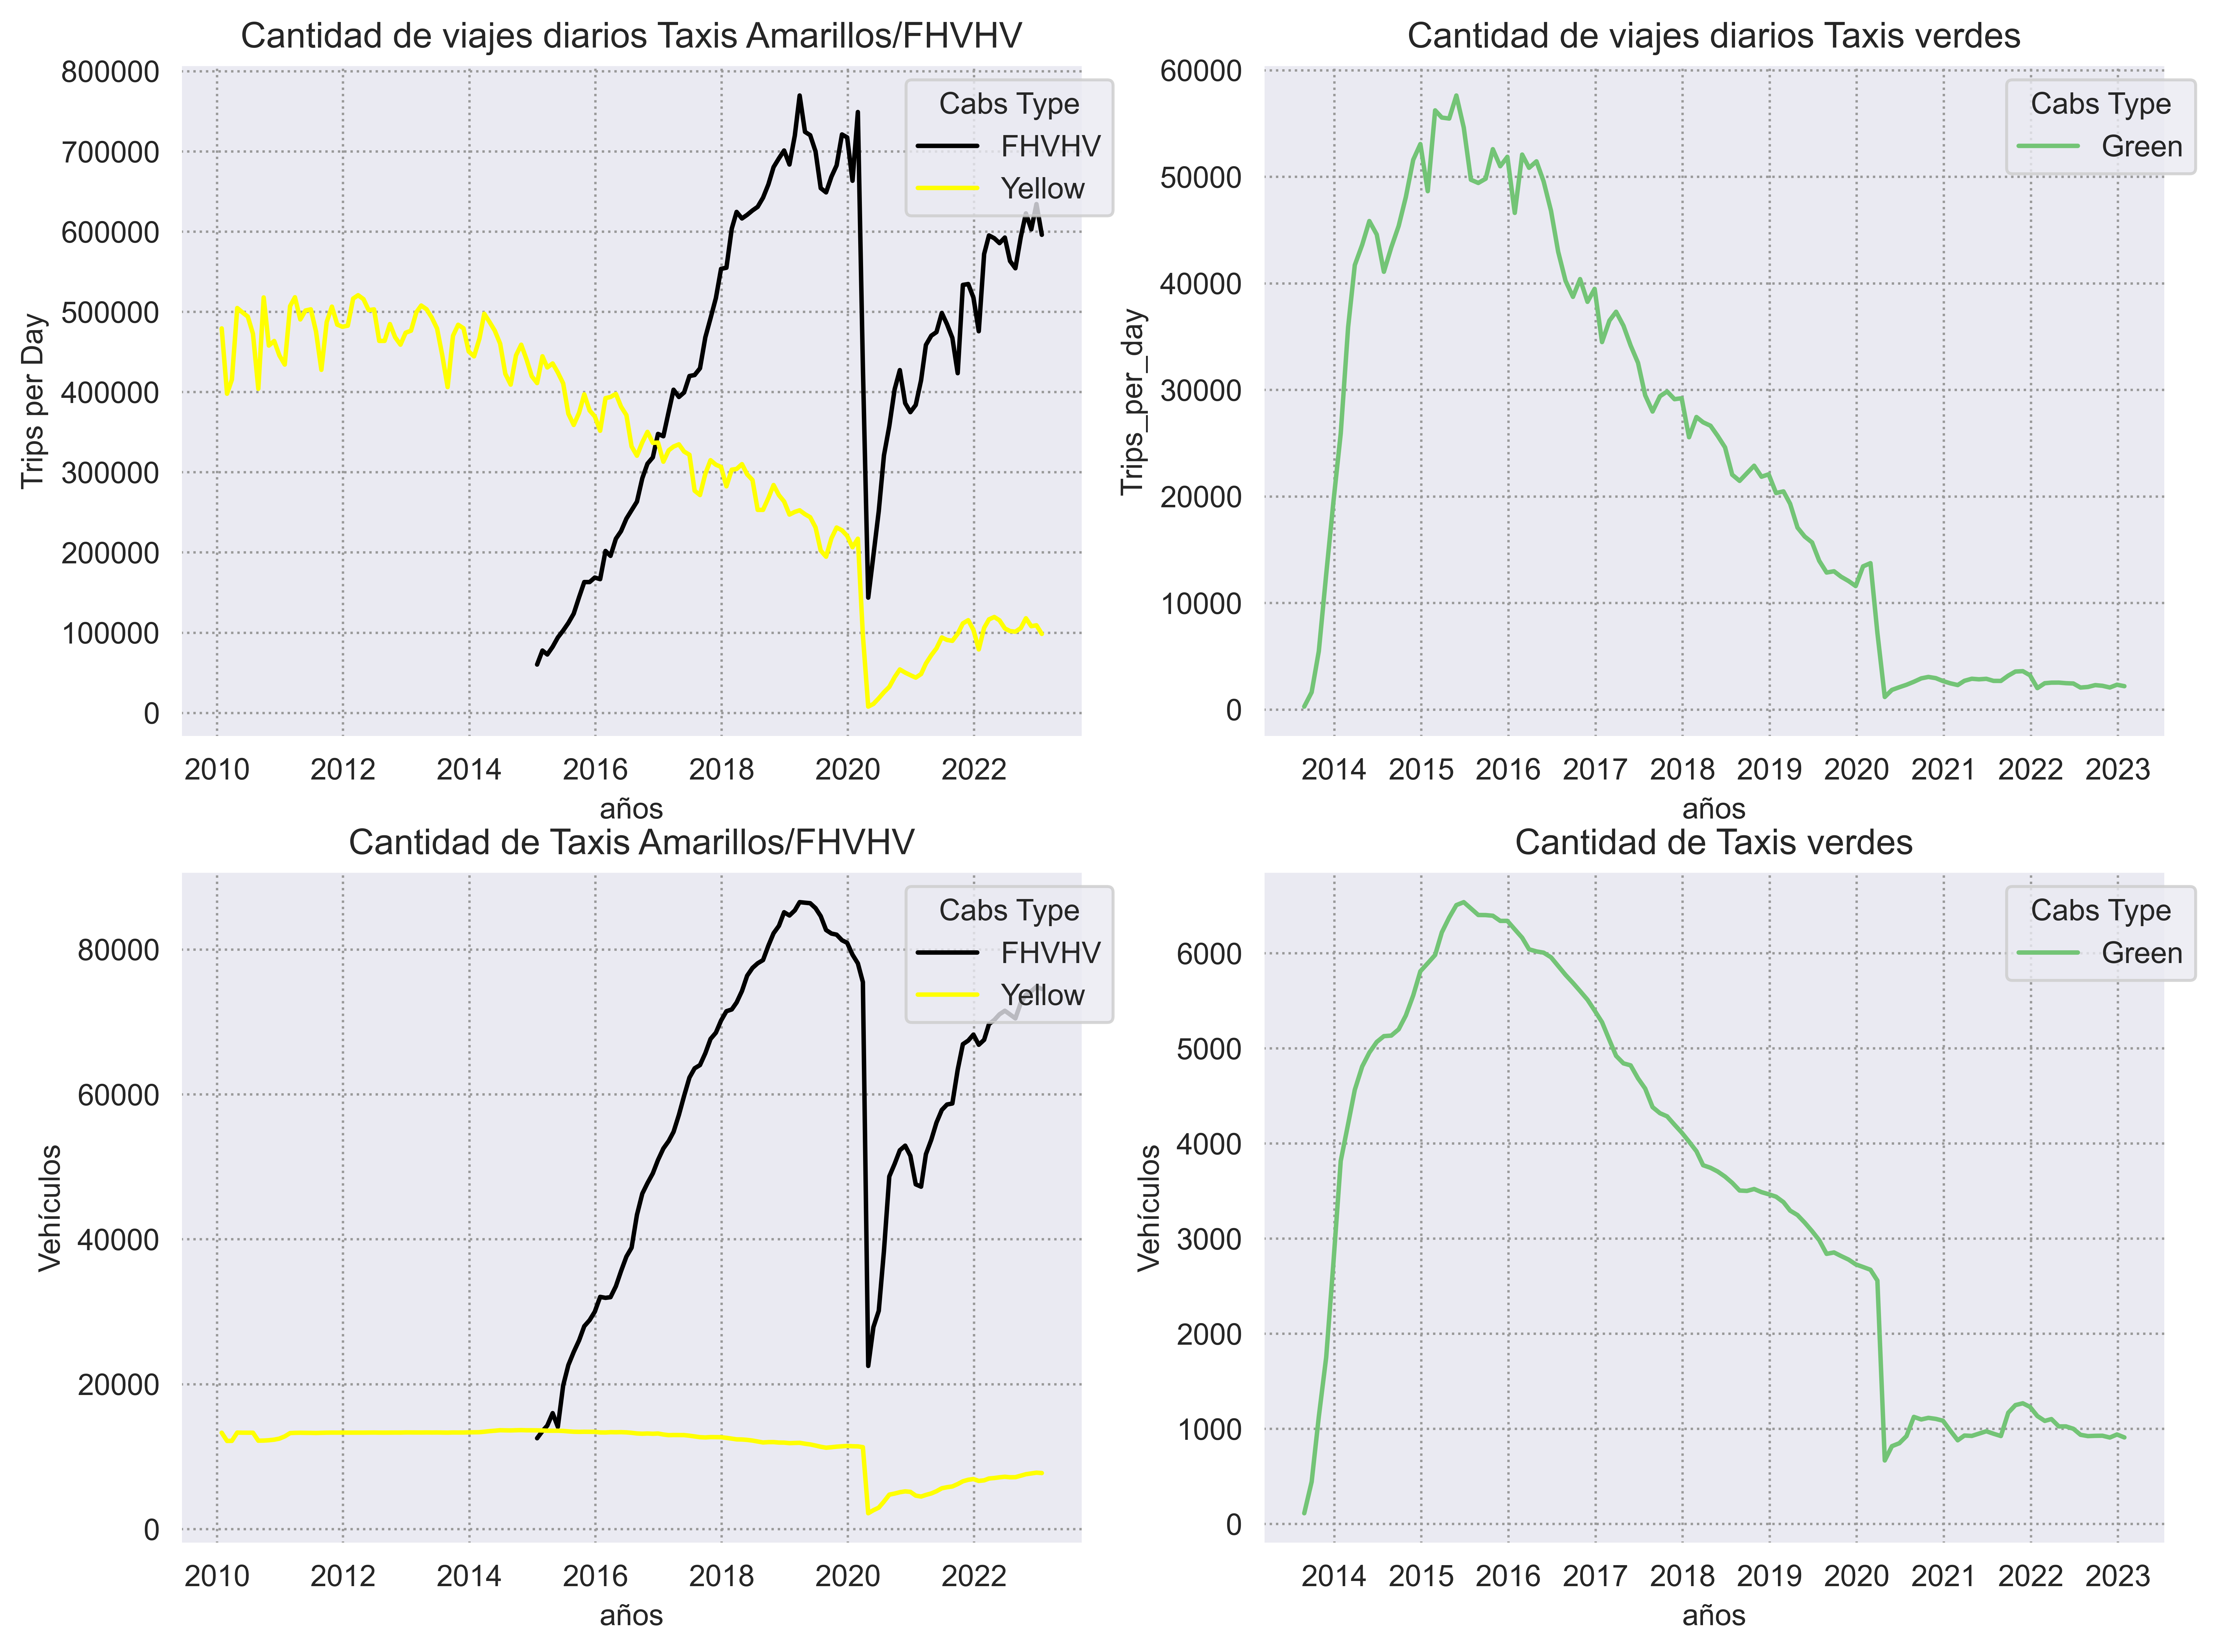

In [97]:
sns.set_style("darkgrid", {"grid.color": ".6", "grid.linestyle": ":"}) # Backgound style

custom_palette = sns.color_palette(['black','yellow'])

# Subplot de 2*2
fig, ax = plt.subplots(2, 2, figsize=(12, 9),dpi=700)

# Graf 1
sns.lineplot(x='month_date',y='trips_per_day',data=industry_metrics_filtered, 
             hue='license_class', markers=True, palette=custom_palette, ax=ax[0,0]) 

 # etiquetas & ejes
ax[0,0].set_xlabel('años')
ax[0,0].set_ylabel('Trips per Day')
ax[0,0].set_title('Cantidad de viajes diarios Taxis Amarillos/FHVHV')
    # Leyenda
ax[0,0].legend(title='Cabs Type', loc='upper right', bbox_to_anchor=(1.05, 1))   

# Graf 2 
sns.lineplot(x='month_date',y='trips_per_day',data=industry_metrics_filtered1, 
             hue='license_class', markers=True, palette="Greens", ax=ax[0,1]) 

 # etiquetas & ejes
ax[0,1].set_xlabel('años')
ax[0,1].set_ylabel('Trips_per_day')
ax[0,1].set_title('Cantidad de viajes diarios Taxis verdes')
    # Leyenda
ax[0,1].legend(title='Cabs Type', loc='upper right', bbox_to_anchor=(1.05, 1))   

# Graf 3
sns.lineplot(x='month_date',y='unique_vehicles',data=industry_metrics_filtered, 
             hue='license_class', markers=True, palette=custom_palette, ax=ax[1,0]) 

 # etiquetas & ejes
ax[1,0].set_xlabel('años')
ax[1,0].set_ylabel('Vehículos')
ax[1,0].set_title('Cantidad de Taxis Amarillos/FHVHV')
    # Leyenda
ax[1,0].legend(title='Cabs Type', loc='upper right', bbox_to_anchor=(1.05, 1))  

# Graf 4 
sns.lineplot(x='month_date',y='unique_vehicles',data=industry_metrics_filtered1, 
             hue='license_class', markers=True, palette="Greens", ax=ax[1,1]) 

 # etiquetas & ejes
ax[1,1].set_xlabel('años')
ax[1,1].set_ylabel('Vehículos')
ax[1,1].set_title('Cantidad de Taxis verdes')
    # Leyenda
ax[1,1].legend(title='Cabs Type', loc='upper right', bbox_to_anchor=(1.05, 1))  


plt.show() # mostrar la gráfica


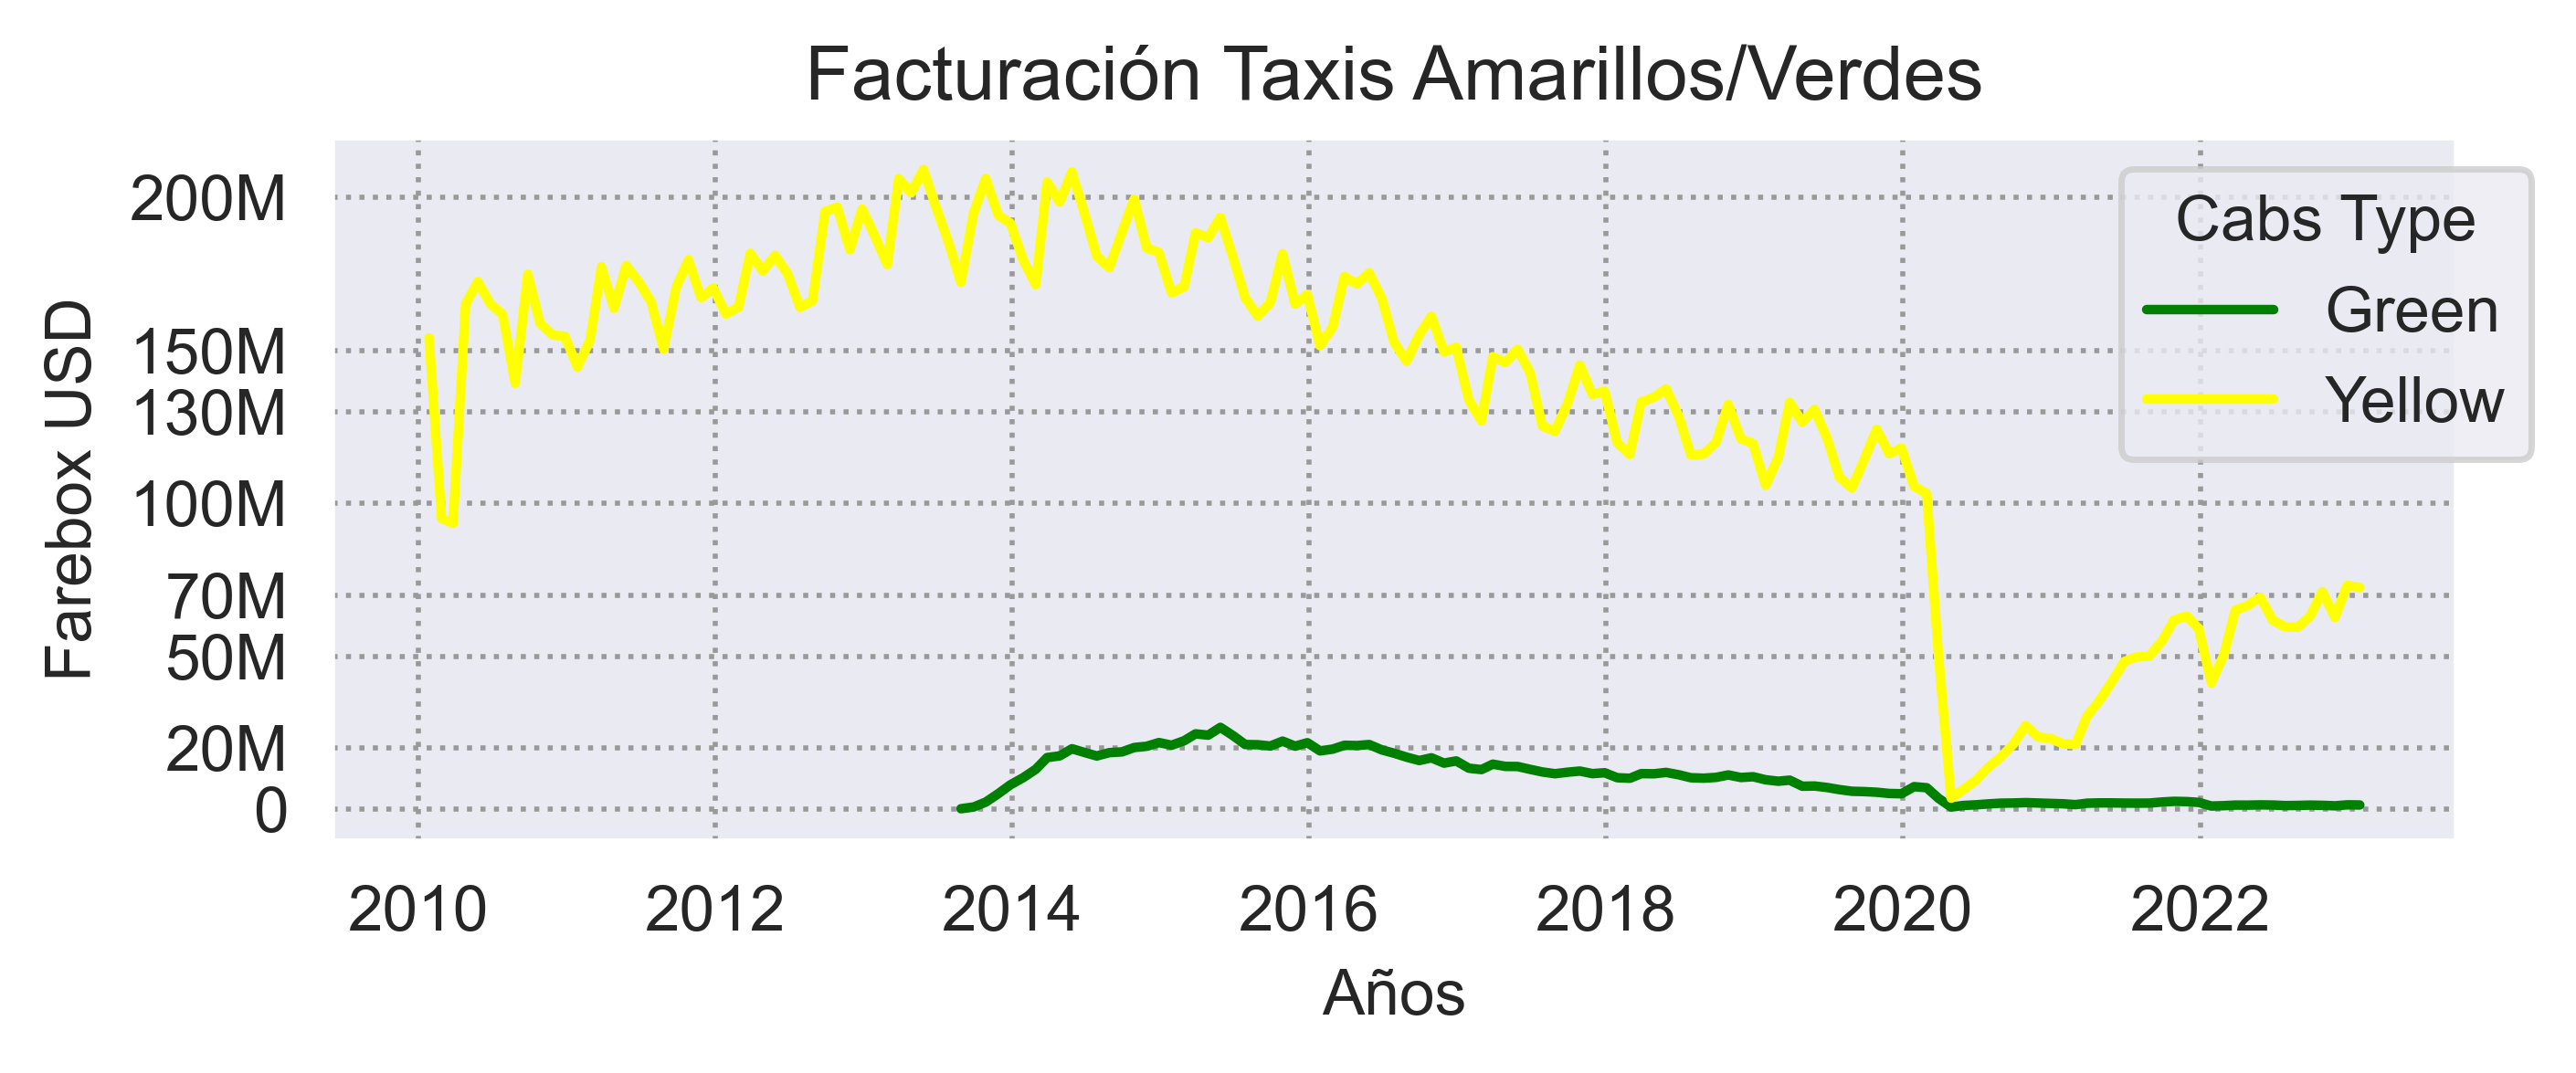

In [107]:

fig, ax = plt.subplots(figsize=(6, 2), dpi=500)

custom_palette = sns.color_palette(['green', 'yellow'])
custom_palette1 = sns.color_palette(['black'])

# Graf 1
sns.lineplot(x='month_date', y='farebox_per_month', data=industry_metrics_filtered4,
             hue='license_class', markers=True, palette=custom_palette, ax=ax)

# etiquetas & ejes
ax.set_xlabel('Años')
ax.set_ylabel('Farebox USD')
ax.set_title('Facturación Taxis Amarillos/Verdes')

# Leyenda
ax.legend(title='Cabs Type', loc='upper right', bbox_to_anchor=(1.05, 1))

# establecer etiquetas personalizadas en el eje y
yticklabels = ['0', '20M', '50M', '70M', '100M', '130M', '150M','200M']
yticks = [0, 2e7, 5e7, 7e7, 1e8, 1.3e8, 1.5e8, 2e8]
ax.set_yticks(yticks)
ax.set_yticklabels(yticklabels)
plt.show()

In [69]:
# Subplot de 1*3
fig, ax = plt.subplots(3, 1, figsize=(20, 12),dpi=800)

sns.barplot(x='month_date', y='trips_per_day', data=industry_metrics_filtered2, ax=ax[0], palette="YlOrBr")
plt.show()

                                                          Devoloped by:
<a href="https://www.linkedin.com/in/takticflow/"><img alt="Luciano" title="Connect with Luciano" src="https://img.shields.io/badge/Luciano Larrea-0077B5?style=flat&logo=Linkedin&logoColor=white"></a>